In [2]:
import numpy as np
import matplotlib.pyplot as plt
import exact_cover 

In [3]:
#AC:
DTYPE = exact_cover.io.DTYPE_FOR_ARRAY
RAW_SHAPES = {
    "F": [[1, 1, 0], [0, 1, 1], [0, 1, 0]],
    "I": [[1, 1, 1, 1, 1]],
    "L": [[1, 0, 0, 0], [1, 1, 1, 1]],
    "N": [[1, 1, 0, 0], [0, 1, 1, 1]],
    "P": [[1, 1, 1], [1, 1, 0]],
    "T": [[1, 1, 1], [0, 1, 0], [0, 1, 0]],
    "U": [[1, 1, 1], [1, 0, 1]],
    "V": [[1, 1, 1], [1, 0, 0], [1, 0, 0]],
    "W": [[1, 0, 0], [1, 1, 0], [0, 1, 1]],
    "X": [[0, 1, 0], [1, 1, 1], [0, 1, 0]],
    "Y": [[0, 1, 0, 0], [1, 1, 1, 1]],
    "Z": [[1, 1, 0], [0, 1, 0], [0, 1, 1]],
}
PENTOMINOS = [np.array(shape, dtype=DTYPE) for shape in RAW_SHAPES.values()]

In [35]:
#AC
# Création de "all_shapes"

pieces = ["F", "I", "L", "N", "P", "T", "U", "V", "W", "X", "Y", "Z"]
all_shapes = {} # Contiendra pour chaque pièce, une liste de toutes les shapes différentes possibles
for piece in pieces:
    new_shape = np.array(RAW_SHAPES[piece])
    new_shape_transpose = new_shape.T
    all_shapes[piece] = [new_shape]
    if not np.array_equal(new_shape, new_shape_transpose):
        all_shapes[piece].append(new_shape_transpose)
    for _ in range(4): # ajout de toutes les rotations/ rotations de symétries
        new_shape = np.rot90(new_shape)
        new_shape_transpose = np.rot90(new_shape_transpose)
        if not any(np.array_equal(shape, new_shape) for shape in all_shapes[piece]): #si new_shape n'est pas identique à une déjà présente
            all_shapes[piece].append(new_shape)
        if not any(np.array_equal(shape, new_shape_transpose) for shape in all_shapes[piece]): #si new_shape n'est pas identique à une déjà présente
            all_shapes[piece].append(new_shape_transpose)


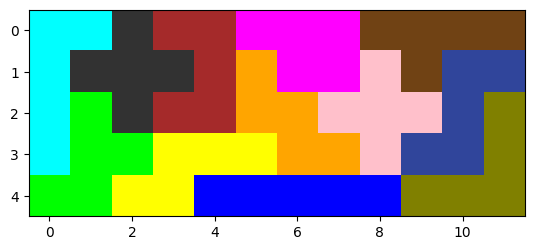

In [49]:
#AC
# Affichage couleurs
colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255],[255, 255, 0], [255, 0, 255], [50, 50, 50], [165, 42, 42], [128, 128, 0],
            [255, 165, 0], [255, 192, 203], [112, 66, 20], [48,69,155]])
grille = np.array([[3, 3, 6, 7, 7, 5, 5, 5, 11, 11, 11, 11],
 [3, 6, 6, 6, 7, 9, 5, 5, 10, 11, 12, 12],
 [3, 1, 6, 7, 7, 9, 9, 10, 10, 10, 12, 8],
 [3,  1,  1,  4,  4,  4,  9,  9, 10, 12, 12,  8],
 [1,  1,  4,  4,  2,  2,  2,  2,  2,  8,  8,  8]])

def display(image):
    plt.figure()
    plt.imshow(image)

#display(colors[grille])

In [24]:
#ER
def tabinf3(tab):
    if 3 in tab:
        return False
    else:
        return True
    
T = [[0,2],[2,0],[0,2]]
s = [[1]]
#print(tabinf3(T))
def tester_shape(shape, tableau):
    ny, nx = tableau.shape
    py, px = shape.shape
    x = nx-px + 1
    y = ny - py + 1
    M=[]
    for i in range(x):
        for j in range(y):
            tableau = test
            test = test * 2
            test[y:y+py,x:x+px] += shape
            b=[]
            if tabinf3(test):
                for L in tableau:
                    for e in L:
                        if e <= 1 :
                            b.append(e)
            M.append(b)
    return M
#la fonction renvoie une matrice contenant les fins de nuplets de chaque n-uplets associés à une shape.

            
print(tester_shape(s,T))            
                            
                
            







AttributeError: 'list' object has no attribute 'shape'

In [ ]:
#GP



In [31]:
#TM
def boucle(dic_lettres,dim,nb_lettres):
    """fonction qui va itérer sur la fonction d'Enak, dic_lettre désigne l'ensemble des lettres 
    (rotations et symétries incluses), dim est la dimension de l'espace (sous forme d'un uplet), 
    nb_lettres est le nombre de lettres (sans prendre en compte les rotations et symétries)"""
    n=len(dic_lettres)
    sol=[]  #on crée la liste des positions possibles, au début nb_lettre de colonnes 
    #puis dim colonnes (positions possibles)
    for lettre in dic_lettres:
        #lis=fonctionEnak(lettre)
        sol.append(lis)
    return(sol)


def bool(mat):
    """transforme un tableau à 2 dimensions contenant des valeurs numériques en booléens :
    False si 0, True sinon"""
    n=len(mat)
    bool=mat.copie() #on copie la matrice initiale, et on remplacera par True ou False
    for i in range(n):
        for j in range(len(mat[i])):
            if mat[i,j]==0:
                bool[i,j]==False
            else :
                bool[i,j]==True
    return(bool)

def resol(bool,mat):
    """résout avec exact_cover le problème codé en booléens par bool et renvoie 
    les colonnes avec les numéros de pièces (codés par mat) correspondant"""
    sol=exact_cover.get_exact_cover(bool)
    return(mat[sol]) #pas sûr sûr de la syntaxe...


def concat(lis,nb_lettres):
    """retourne une liste de liste issus de la variable lis à laquelle on a enlevé les 
    nb_lettres premières colonnes (indiquant si la pièce est utilisée ou pas"""
    lisf=[]
    n=len(lis)
    #print(n)
    for i in range (n):
        lisf.append(lis[i,nb_lettres:])
    return(lisf)
    

#concat(np.array([[0,1,2],[3,4,5],[6,7,9]]),2)
"""
def plan(lis,dim):
    """prend une lis sortant de concat et donne un matrice avec tous les numéros de pièces
    dim est un tupple contenant les dimensions de l'espace"""
    sol=np.zeros(dim)
    for i in range(len(lis)):
        #on doit avoir len(lis[i]) = dim[0]*dim[1]
        for j in range(len(lis[i])):
            if lis[i,j]!=0:
                sol[i%dim[0],i//dim[1]]=lis[i,j]
    return(sol)

lis=np.array([[0,1,0,12],[0,0,5,0],[6,0,0,0]])
plan(lis,(2,2))

"""

array([[12.,  6.],
       [ 5.,  0.]])